## Time series en Pandas

- Pandas tiene los objetos ``Timestamp`` que combinan la facilidad de  ``datetime`` y ``dateutil`` con una implementación vectorizada eficiente.

- Usando los objetos ``Timestamp``, pandas construye un ``DatetimeIndex``  para ser usado como índice en ``Series`` o ``DataFrame``.

- Las clases de Pandas para series temporales son:

    * ``Timestamp``: reemplazo de ``datetime``, basado en el sistema más eficiente de ``numpy.datetime64``. La estructura del índice asociada será ``DatetimeIndex``.
    * ``Period``: para periodos de tiempo. La estructura del índice asociado es ``PeriodIndex``.
    * ``Timedelta``: para variación de tiempo o duración (más eficiente que ``datetime.timedelta``). La estructura del índice asociado es ``TimedeltaIndex``.

- Los tipos más básicos son ``Timestamp`` y ``DatetimeIndex``.

- La forma más común de crear objetos de este tipo es usando la función ``pd.to_datetime()`` .

- Puede parsear una gran variedad de formatos.
 
- Pasar una fecha a esta función produce un ``Timestamp``; pasar una serie de fechas por defecto devuelve un ``DatetimeIndex``:

In [1]:
#! pip install datetime
from datetime import datetime, date, time, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Cargamos dataframe

In [20]:
# para ejecutar en local
#power_data = pd.read_csv("data/Power_consumption.csv")

# para ejecutar en colab
power_data = pd.read_csv("https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/5_series_temporales/data/Power_consumption.csv")

Exploramos su contenido

In [9]:
power_data.head(5)

,Date,Time,Consumption,Wind,Solar
0,2006-01-01,16:34:01.310990,1069.184,NaN,NaN
1,2006-01-02,17:34:01.310990,1380.521,NaN,NaN
2,2006-01-03,18:34:01.310990,1442.533,NaN,NaN
3,2006-01-04,19:34:01.310990,1457.217,NaN,NaN
4,2006-01-05,20:34:01.310990,1477.131,NaN,NaN


In [10]:
power_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Time         4383 non-null   object 
 2   Consumption  4383 non-null   float64
 3   Wind         2920 non-null   float64
 4   Solar        2188 non-null   float64
dtypes: float64(3), object(2)
memory usage: 171.3+ KB


Convertimos columnas a datetime

In [22]:
power_data['Date'] = pd.to_datetime(power_data['Date'], format="%Y-%m-%d")
power_data['Time'] = pd.to_datetime(power_data['Time'], format="%H:%M:%S.%f")

power_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Time         4383 non-null   datetime64[ns]
 2   Consumption  4383 non-null   float64       
 3   Wind         2920 non-null   float64       
 4   Solar        2188 non-null   float64       
dtypes: datetime64[ns](2), float64(3)
memory usage: 171.3 KB


Extraemos año, mes, dia, hora, minuto y segundo

In [25]:
# Year
power_data.loc[:, 'year'] = power_data.loc[:, "Date"].dt.year
# Month
power_data.loc[:, 'month'] = power_data.loc[:, "Date"].dt.month
# Day
power_data.loc[:, 'day'] = power_data.loc[:, "Date"].dt.day

# Hour
power_data.loc[:, 'hour'] = power_data.loc[:, "Time"].dt.hour
# Minute
power_data.loc[:, 'minute'] = power_data.loc[:, "Time"].dt.minute
# Second
power_data.loc[:, 'second'] = power_data.loc[:, "Time"].dt.second


In [26]:
power_data

,Date,Time,Consumption,Wind,Solar,year,month,day,hour,minute,second
0,2006-01-01,1900-01-01 16:34:01.310990,1069.18400,NaN,NaN,2006,1,1,16,34,1
1,2006-01-02,1900-01-01 17:34:01.310990,1380.52100,NaN,NaN,2006,1,2,17,34,1
2,2006-01-03,1900-01-01 18:34:01.310990,1442.53300,NaN,NaN,2006,1,3,18,34,1
3,2006-01-04,1900-01-01 19:34:01.310990,1457.21700,NaN,NaN,2006,1,4,19,34,1
4,2006-01-05,1900-01-01 20:34:01.310990,1477.13100,NaN,NaN,2006,1,5,20,34,1
...,...,...,...,...,...,...,...,...,...,...,...
4378,2017-12-27,1900-01-01 02:34:01.310990,1263.94091,394.507,16.530,2017,12,27,2,34,1
4379,2017-12-28,1900-01-01 03:34:01.310990,1299.86398,506.424,14.162,2017,12,28,3,34,1
4380,2017-12-29,1900-01-01 04:34:01.310990,1295.08753,584.277,29.854,2017,12,29,4,34,1
4381,2017-12-30,1900-01-01 05:34:01.310990,1215.44897,721.247,7.467,2017,12,30,5,34,1


Diferentes maneras de componer el índice con fecha y hora

In [39]:
power_data = pd.read_csv("https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/5_series_temporales/data/Power_consumption.csv")

# Unimos las cadenas que contienen la fecha y la hora
power_data['Datetime'] = power_data['Date'] + ' ' + power_data['Time']

# Convertimos la cadena a un objeto datetime
power_data['Datetime'] = pd.to_datetime(power_data['Datetime'])

# Establecemos el índice
power_data = power_data.set_index('Datetime')

power_data.index

DatetimeIndex(['2006-01-01 16:34:01.310990', '2006-01-02 17:34:01.310990',
               '2006-01-03 18:34:01.310990', '2006-01-04 19:34:01.310990',
               '2006-01-05 20:34:01.310990', '2006-01-06 21:34:01.310990',
               '2006-01-07 22:34:01.310990', '2006-01-08 23:34:01.310990',
               '2006-01-09 00:34:01.310990', '2006-01-10 01:34:01.310990',
               ...
               '2017-12-22 21:34:01.310990', '2017-12-23 22:34:01.310990',
               '2017-12-24 23:34:01.310990', '2017-12-25 00:34:01.310990',
               '2017-12-26 01:34:01.310990', '2017-12-27 02:34:01.310990',
               '2017-12-28 03:34:01.310990', '2017-12-29 04:34:01.310990',
               '2017-12-30 05:34:01.310990', '2017-12-31 06:34:01.310990'],
              dtype='datetime64[ns]', name='Datetime', length=4383, freq=None)

`parse_dates`: bool, list of Hashable, list of lists or dict of {Hashablelist}, default False. The behavior is as follows:
* **bool**. If True -> try parsing the index.
* **list of int or names. e.g. If [1, 2, 3]** -> try parsing columns 1, 2, 3 each as a separate date column.
* **list of list. e.g. If [[1, 3]]** -> combine columns 1 and 3 and parse as a single date column.
* **dict, e.g. {'foo' : [1, 3]}** -> parse columns 1, 3 as date and call result ‘foo’

In [10]:
power_data_dates = pd.read_csv(
    'https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/5_series_temporales/data/Power_consumption.csv',
    parse_dates = ['Date','Time'])
power_data_dates.head()

C:\Users\pvent\AppData\Local\Temp\ipykernel_4856\4079972962.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  power_data_dates = pd.read_csv(


,Date,Time,Consumption,Wind,Solar
0,2006-01-01,2023-11-05 16:34:01.310990,1069.184,NaN,NaN
1,2006-01-02,2023-11-05 17:34:01.310990,1380.521,NaN,NaN
2,2006-01-03,2023-11-05 18:34:01.310990,1442.533,NaN,NaN
3,2006-01-04,2023-11-05 19:34:01.310990,1457.217,NaN,NaN
4,2006-01-05,2023-11-05 20:34:01.310990,1477.131,NaN,NaN


In [12]:
power_data_dates = pd.read_csv(
    'https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/5_series_temporales/data/Power_consumption.csv',
    parse_dates = [['Date','Time']],
    index_col = 0)
power_data_dates.head()

,Consumption,Wind,Solar
Date_Time,,,
2006-01-01 16:34:01.310990,1069.184,NaN,NaN
2006-01-02 17:34:01.310990,1380.521,NaN,NaN
2006-01-03 18:34:01.310990,1442.533,NaN,NaN
2006-01-04 19:34:01.310990,1457.217,NaN,NaN
2006-01-05 20:34:01.310990,1477.131,NaN,NaN


In [14]:
power_data_dates = pd.read_csv(
    'https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/5_series_temporales/data/Power_consumption.csv',
    parse_dates = {"DateTimeIdx": ['Date','Time']},
    index_col = 0)
power_data_dates.head()

,Consumption,Wind,Solar
DateTimeIdx,,,
2006-01-01 16:34:01.310990,1069.184,NaN,NaN
2006-01-02 17:34:01.310990,1380.521,NaN,NaN
2006-01-03 18:34:01.310990,1442.533,NaN,NaN
2006-01-04 19:34:01.310990,1457.217,NaN,NaN
2006-01-05 20:34:01.310990,1477.131,NaN,NaN


In [15]:
power_data_dates.index

DatetimeIndex(['2006-01-01 16:34:01.310990', '2006-01-02 17:34:01.310990',
               '2006-01-03 18:34:01.310990', '2006-01-04 19:34:01.310990',
               '2006-01-05 20:34:01.310990', '2006-01-06 21:34:01.310990',
               '2006-01-07 22:34:01.310990', '2006-01-08 23:34:01.310990',
               '2006-01-09 00:34:01.310990', '2006-01-10 01:34:01.310990',
               ...
               '2017-12-22 21:34:01.310990', '2017-12-23 22:34:01.310990',
               '2017-12-24 23:34:01.310990', '2017-12-25 00:34:01.310990',
               '2017-12-26 01:34:01.310990', '2017-12-27 02:34:01.310990',
               '2017-12-28 03:34:01.310990', '2017-12-29 04:34:01.310990',
               '2017-12-30 05:34:01.310990', '2017-12-31 06:34:01.310990'],
              dtype='datetime64[ns]', name='DateTimeIdx', length=4383, freq=None)

### Generando rangos de fechas

Calendario de pandas:
* Los días laborables son de lunes a viernes
* Las horas laborables son de 9:00 a 17:00
* No hay vacaciones ni días festivos

Ref: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

| Code   | Description         |
|--------|---------------------|
| ``D``  | Calendar day        |
| ``B``  | Business day        |
| ``W``  | Weekly              |       
| ``M``  | Month end           | 
|``BM`` | Business month end   |
| ``Q``  | Quarter end         |
| ``BQ`` | Business quarter end|
| ``A``  | Year end            | 
|``BA`` | Business year end    |
| ``H``  | Hours               |
|``BH`` | Business hours       |
| ``T`` o ``min`` | Minutes             |       
| ``S``  | Seconds             |       
| ``L``  | Milliseconds         |       
| ``U``  | Microseconds        |     
| ``N``  | nanoseconds         |       

- Las frecuencias mensual, trimestral y anual se proporcionan como fecha al final del periodo especificado.
- Añadiendo una 'S' al final de cada una de estas, la salida será al inicio del periodo.

| Code    | Description            |
|---------|------------------------|
| ``MS``  | Month start            |
| ``QS``  | Quarter start          |
| ``AS``  | Year start             |
|``BMS``  | Business month start   |
|``BQS``  | Business quarter start |
|``BAS``  | Business year start    |

- Además se puede cambiar el mes usado en frecuencias trimestrales o anuales añadiendo un código de tres letras al final:
 * ``Q-JAN``, ``BQ-FEB``, ``QS-MAR``, ``BQS-APR``, etc.
 * ``A-JAN``, ``BA-FEB``, ``AS-MAR``, ``BAS-APR``, etc.

Generamos un rango de fechas dando fecha de inicio y final. Por defecto genera una serie diaria

In [16]:
start = datetime(2021, 1, 1)
end = datetime(2022, 1, 1)

# date_range: Return a fixed frequency DatetimeIndex.
index = pd.date_range(start, end)
index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-23', '2021-12-24', '2021-12-25', '2021-12-26',
               '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30',
               '2021-12-31', '2022-01-01'],
              dtype='datetime64[ns]', length=366, freq='D')

Generar los días laborables (quitando fines de semana)

In [18]:
start = datetime(2021, 1, 1)
end = datetime(2022, 1, 1)

# date_range: Return a fixed frequency DatetimeIndex.
index = pd.date_range(start, end, freq="B")
index

DatetimeIndex(['2021-01-01', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14',
               ...
               '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
               '2021-12-24', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=261, freq='B')

In [19]:
# ddate_range: Return a fixed frequency DatetimeIndex with business day as the default.
index_b = pd.bdate_range(start, end)
index_b

DatetimeIndex(['2021-01-01', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14',
               ...
               '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
               '2021-12-24', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=261, freq='B')

Serie mensual compuesta de 1000 meses. Por defecto genera el último día de cada mes

In [20]:
pd.date_range(start, periods=1000, freq="M") # freq = "M" es el último día del mes -> "Month"

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31',
               ...
               '2103-07-31', '2103-08-31', '2103-09-30', '2103-10-31',
               '2103-11-30', '2103-12-31', '2104-01-31', '2104-02-29',
               '2104-03-31', '2104-04-30'],
              dtype='datetime64[ns]', length=1000, freq='M')

Si queremos el primer día de cada mes

In [21]:
pd.date_range(start, periods=1000, freq="MS") # freq = "MS" es el primer día del mes -> "Month Start"

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01',
               ...
               '2103-07-01', '2103-08-01', '2103-09-01', '2103-10-01',
               '2103-11-01', '2103-12-01', '2104-01-01', '2104-02-01',
               '2104-03-01', '2104-04-01'],
              dtype='datetime64[ns]', length=1000, freq='MS')

Horas laborables

In [22]:
diarios_df = pd.DataFrame(index=pd.date_range(start, periods=10, freq='BH'))
diarios_df

""
2021-01-01 09:00:00
2021-01-01 10:00:00
2021-01-01 11:00:00
2021-01-01 12:00:00
2021-01-01 13:00:00
2021-01-01 14:00:00
2021-01-01 15:00:00
2021-01-01 16:00:00
2021-01-04 09:00:00
2021-01-04 10:00:00


In [28]:
start = "2021-01-01"
end = "2021-01-01 17:00:00"
diarios_df = pd.DataFrame(index=pd.date_range(start, end=end, freq='H'))
diarios_df

""
2021-01-01 00:00:00
2021-01-01 01:00:00
2021-01-01 02:00:00
2021-01-01 03:00:00
2021-01-01 04:00:00
2021-01-01 05:00:00
2021-01-01 06:00:00
2021-01-01 07:00:00
2021-01-01 08:00:00
2021-01-01 09:00:00


In [38]:
from pandas.tseries.offsets import CustomBusinessHour

start = datetime(2021, 2, 1)
end = datetime(2021, 2, 3)

cbh = CustomBusinessHour(start='09:00', end='19:00')
diarios_df = pd.DataFrame(index=pd.date_range(start=start, end=end, freq=cbh))
list(diarios_df.index)



[Timestamp('2021-02-01 09:00:00'),
 Timestamp('2021-02-01 10:00:00'),
 Timestamp('2021-02-01 11:00:00'),
 Timestamp('2021-02-01 12:00:00'),
 Timestamp('2021-02-01 13:00:00'),
 Timestamp('2021-02-01 14:00:00'),
 Timestamp('2021-02-01 15:00:00'),
 Timestamp('2021-02-01 16:00:00'),
 Timestamp('2021-02-01 17:00:00'),
 Timestamp('2021-02-01 18:00:00'),
 Timestamp('2021-02-02 09:00:00'),
 Timestamp('2021-02-02 10:00:00'),
 Timestamp('2021-02-02 11:00:00'),
 Timestamp('2021-02-02 12:00:00'),
 Timestamp('2021-02-02 13:00:00'),
 Timestamp('2021-02-02 14:00:00'),
 Timestamp('2021-02-02 15:00:00'),
 Timestamp('2021-02-02 16:00:00'),
 Timestamp('2021-02-02 17:00:00'),
 Timestamp('2021-02-02 18:00:00')]

### __Facilidades de fechas en pandas:__

Ref.: https://pandas.pydata.org/pandas-docs/stable/reference/series.html

Leemos el fichero con datos de niveles de $NO_{2}$

In [29]:
# para ejecutar en local
#air_quality = pd.read_csv("data/air_quality_no2_long.csv", parse_dates=["datetime"])

# para ejecutar en colab
air_quality = pd.read_csv(
    "https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/5_series_temporales/data/air_quality_no2_long.csv",
    parse_dates=["datetime"])
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [31]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   datetime   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 113.2+ KB


Podemos asignar cada fila a un mes o a la semana etc

In [57]:
air_quality["month"] = air_quality["datetime"].dt.month
air_quality["week"] = air_quality["datetime"].dt.week
air_quality.head()

/tmp/ipykernel_3628/34351876.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  air_quality["week"] = air_quality["datetime"].dt.week


,city,country,datetime,location,parameter,value,unit,month,week
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6,25
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6,25
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6,25
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6,25
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6,25


Podemos calcular estadísticas basadas en la fecha, por ejemplo calcular datos por día de la semana

In [70]:
air_quality.groupby([air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

Podemos dibujar la concentración de $NO_{2}$ para cada hora

Por partes, este código hace lo siguiente:

1. `air_quality.groupby(air_quality["datetime"].dt.hour)`: Esto agrupa el DataFrame `air_quality` por la hora de la columna `datetime`. `.dt` se utiliza para acceder a las propiedades y métodos de `datetime`, y `.hour` obtiene la parte de la hora del datetime.
2. `["value"].mean()`: Esto calcula la media (promedio) de la columna `value` para cada grupo (en este caso, cada hora del día).
3. `.plot(kind='bar', rot=0, ax=axs)`: Esto traza la media de `value` para cada hora como un gráfico de barras. El argumento `rot=0` especifica que las etiquetas del eje x no deben rotarse, y `ax=axs` especifica el objeto de ejes en el que dibujar el gráfico.

Text(0.5, 1.0, 'Concentración NO2')

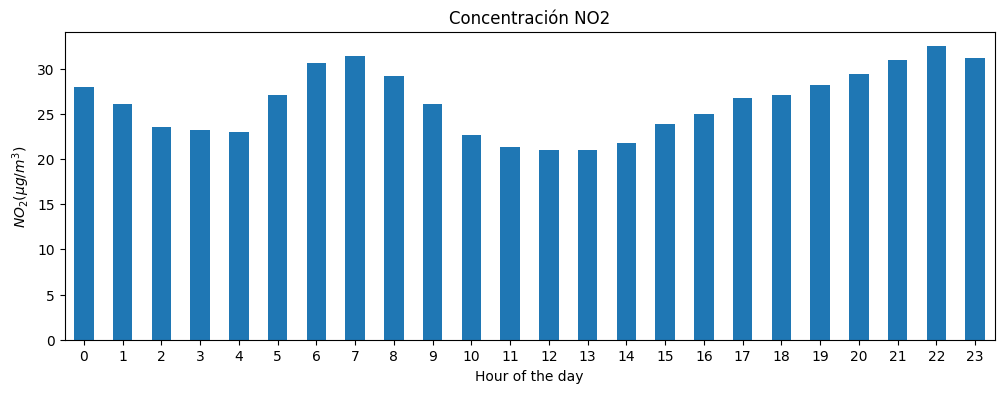

In [39]:
fig, axs = plt.subplots(figsize=(12, 4))

air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(kind='bar', rot=0, ax=axs)

plt.xlabel("Hour of the day");  # custom x label using matplotlib
plt.ylabel("$NO_2 (µg/m^3)$");
plt.title('Concentración NO2')

### Time Series con índices duplicados

In [32]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [33]:
dup_ts.index.is_unique

False

In [34]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

- Para eliminarlos podemos agrupar por nivel 0 y realizar una operación que los unifique.

In [36]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [37]:
grouped.first()

2000-01-01    0
2000-01-02    1
2000-01-03    4
dtype: int32

In [38]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [39]:
# Obtener un nuevo DataFrame a partir de un DataFrame agrupado
grouped_df = pd.DataFrame(grouped.mean())
grouped_df

,0
2000-01-01,0.0
2000-01-02,2.0
2000-01-03,4.0


### Date Offsets

In [41]:
rango = pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')
rango

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [61]:
from pandas.tseries.offsets import Hour, Minute

rango + Hour(2) + Minute(30)

DatetimeIndex(['2000-01-01 02:30:00', '2000-01-01 06:30:00',
               '2000-01-01 10:30:00', '2000-01-01 14:30:00',
               '2000-01-01 18:30:00', '2000-01-01 22:30:00',
               '2000-01-02 02:30:00', '2000-01-02 06:30:00',
               '2000-01-02 10:30:00', '2000-01-02 14:30:00',
               '2000-01-02 18:30:00', '2000-01-02 22:30:00',
               '2000-01-03 02:30:00', '2000-01-03 06:30:00',
               '2000-01-03 10:30:00', '2000-01-03 14:30:00',
               '2000-01-03 18:30:00', '2000-01-03 22:30:00'],
              dtype='datetime64[ns]', freq='4H')

In [42]:
rango + timedelta(days=1, seconds=30)

DatetimeIndex(['2000-01-02 00:00:30', '2000-01-02 04:00:30',
               '2000-01-02 08:00:30', '2000-01-02 12:00:30',
               '2000-01-02 16:00:30', '2000-01-02 20:00:30',
               '2000-01-03 00:00:30', '2000-01-03 04:00:30',
               '2000-01-03 08:00:30', '2000-01-03 12:00:30',
               '2000-01-03 16:00:30', '2000-01-03 20:00:30',
               '2000-01-04 00:00:30', '2000-01-04 04:00:30',
               '2000-01-04 08:00:30', '2000-01-04 12:00:30',
               '2000-01-04 16:00:30', '2000-01-04 20:00:30'],
              dtype='datetime64[ns]', freq='4H')

In [50]:
# Python
import pandas as pd
from dateutil.relativedelta import relativedelta

# Creamos un DatetimeIndex con un rango de fechas
rango = pd.date_range('2022-01-01', '2022-01-31')

# Añadimos un relativedelta de 1 mes y 1 día a cada elemento del DatetimeIndex
rango_nuevo = pd.DatetimeIndex([fecha + relativedelta(months=1, days=1) for fecha in rango])

# Imprimimos el resultado
print(rango_nuevo)



DatetimeIndex(['2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05',
               '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09',
               '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
               '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
               '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21',
               '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
               '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01',
               '2022-03-01', '2022-03-01', '2022-03-01'],
              dtype='datetime64[ns]', freq=None)


___
# Ejercicios

Genera un DataFrame, que tenga como índice  los días del 1 de Enero, al 1 de Junio. Añade una columna con datos cualesquiera(aleatorios, rango...)

Selecciona los días que sean lunes

Selecciona los días laborables